About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [263]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Download the [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

In [265]:
h = pd.read_csv('heart_disease_uci.csv')
h.sample(4)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
698,699,63,Male,Switzerland,asymptomatic,150.0,0.0,False,normal,86.0,True,2.0,flat,NaN,NaN,3
60,61,51,Female,Cleveland,asymptomatic,130.0,305.0,False,normal,142.0,True,1.2,flat,0.0,reversable defect,2
21,22,58,Female,Cleveland,typical angina,150.0,283.0,True,lv hypertrophy,162.0,False,1.0,upsloping,0.0,normal,0
834,835,50,Male,VA Long Beach,asymptomatic,NaN,218.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,1


# Task 1 (2 points)

Compute the mean, quartiles(Q1, Q2, Q3) and std for every numerical feature (also include column `'id'`).

In [267]:
nums = h.select_dtypes(include=['number']).columns
q = h[nums].quantile([0.25, 0.5, 0.75])
q = q.rename(index={0.25: 'Q1', 0.5: 'Median (Q2)', 0.75: 'Q3'})
print(quartiles)

print("----------------------------------------------------------------------")

std = h[nums].std()
std_h = pd.DataFrame(std, columns=['std'])
print(std_h)

                 id   age  trestbps   chol  thalch  oldpeak   ca  num
Q1           230.75  47.0     120.0  175.0   120.0      0.0  0.0  0.0
Median (Q2)  460.50  54.0     130.0  223.0   140.0      0.5  0.0  1.0
Q3           690.25  60.0     140.0  268.0   157.0      1.5  1.0  2.0
----------------------------------------------------------------------
                 std
id        265.725422
age         9.424685
trestbps   19.066070
chol      110.780810
thalch     25.926276
oldpeak     1.091226
ca          0.935653
num         1.142693


Let's look into `'id'` feature. Does it seem to differ from other variables? If yes, how?

**Answer:** The standard deviation of 'id' is extremely high (265.725422) compared to other features. For example, 'age' has a std of ~9.42, and 'trestbps' has ~9.42. Thi suggests 'id' values are spread out over a much wider range



Draw the distribution of the `'id'` variable. Describe it and explain, why does it look like this. What useful information about heart disease can be extracted from it?

[(0.0, 920.0)]

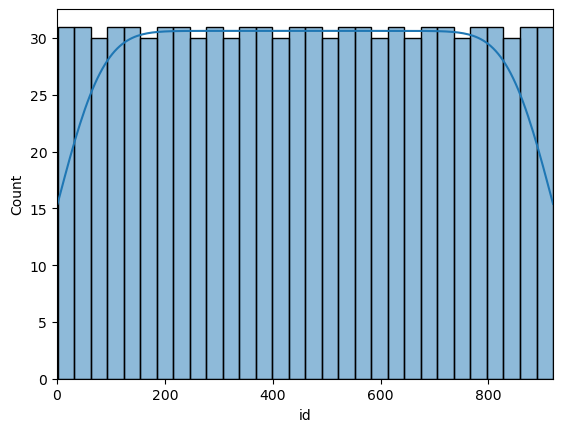

In [269]:
sns.histplot(h['id'], bins=30, kde=True).set(xlim=(0, h['id'].quantile(1)))


**Answer:** 

nearly uniform distribution, with frequency counts that are almost equal across all bins

no useful information can be derived from the 'id' variable

# Task 2 (2 points)

Let's search for outliers in numerical variables (do not include `'id'`).

First of all, draw boxplots for every one of them on one figure.

Hint: use `plt.subplots`

Describe the plots:



*   Which features do not have any outliers?
*   Which features seem to have the maximum number of outliers?
*   For which features it may be hard to count the number of outliers? Why?





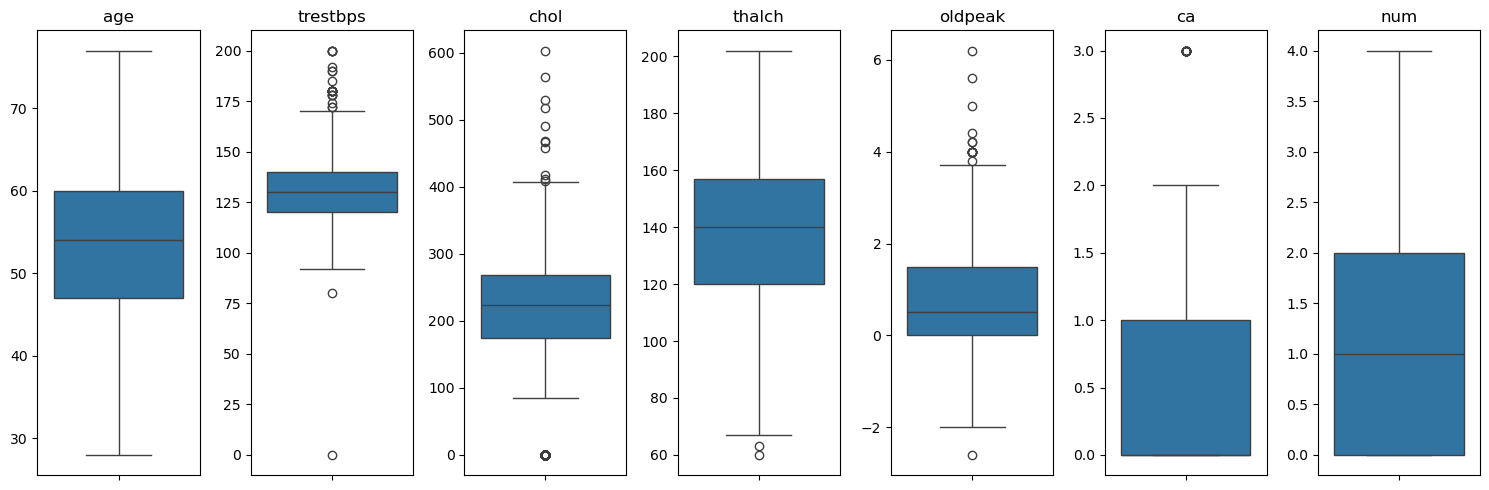

In [271]:
nums = h.select_dtypes(include=['number']).columns.drop('id')
fig, axes = plt.subplots(nrows= 1, ncols=len(nums), figsize=(15, 5))

for ax, col in zip(axes, nums):
    sns.boxplot(y=h[col], ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

**Answer:** 

The data shows that the features age and num likely have no outliers, as their values decrease consistently without extreme deviations. In contrast, chol, trestbps, and oldpeak appear to have the most outliers, with wide ranges (for exaample 0–600 for chol and 25–200 for trestbps). However, identifying outliers is challenging for thalch and ca due to irregular patterns (thalch drops abruptly from 60 to 8) and inconsistent decrements (ca skips values unpredictably). Missing entries and unclear expected ranges further complicate outlier detection for these features

Use the $1.5IQR$ approach and count the number of outliers for each column.

In [273]:
nums = h.select_dtypes(include='number').drop(columns=['id'])
Q1 = nums.quantile(0.25)
Q3 = nums.quantile(0.75)
IQR = Q3 - Q1

outl = (nums < (Q1 - 1.5*IQR)) | (nums > (Q3 + 1.5*IQR))
outl_count = outl.sum()
outl_pct = outl.mean() * 100
result = pd.DataFrame({'выбросы': outliers_count, '%': outliers_pct.round(1)})
print(result)

          выбросы     %
age             0   0.0
trestbps       28   3.0
chol          183  19.9
thalch          2   0.2
oldpeak        16   1.7
ca             20   2.2
num             0   0.0


For the feature with most outliers, draw the histogram and depict the bounds. Do the bounds seem too tight or too wide? Is deleting all outliers for this feature a good idea?

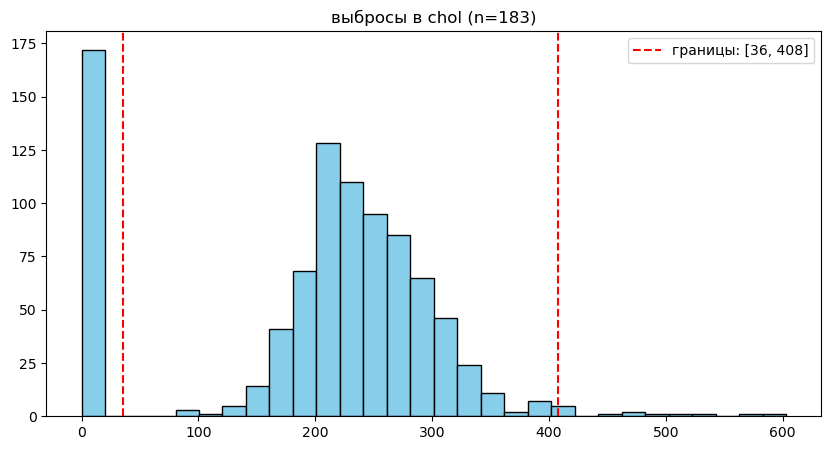

In [275]:
q1, q3 = h['chol'].quantile([0.25, 0.75])
lower, upper = q1 - 1.5*(q3-q1), q3 + 1.5*(q3-q1)

plt.figure(figsize=(10,5))
plt.hist(h['chol'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(lower, c='r', ls='--', label=f'границы: [{lower:.0f}, {upper:.0f}]')
plt.axvline(upper, c='r', ls='--')
plt.title(f'выбросы в chol (n={(h['chol']<lower).sum() + (h['chol']>upper).sum()})')
plt.legend()
plt.show()

**Answer:** 

Too Tight? No— the lower bound is reasonable (cholesterol cannot be 0 in reality).

Too Wide? The upper bound is too forgiving

No — deleting all outliers is risky because extreme values may be real (except 0)

# Task 3 (2 points)

Find the group (or groups) of people that will be deleted, if we delete all the outliers for the feature with the most outliers from the previous task.

In [277]:
q1, q3 = h['chol'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outl_mask = (h['chol'] < lower_bound) | (h['chol'] > upper_bound)
outl_h = h[outl_mask]
print("Groups that would be deleted:")
print("----------------------------")

for col in ['sex','dataset','cp','fbs','restecg','exang','slope','thal','num']:  
    if col in h.columns:
        print(f"\nBy {col}:")
        print(outl_h[col].value_counts())

if 'age' in h.columns:
    print("\nAge distribution of outliers:")
    print(outl_h['age'].describe())

print(f"Total dsta to be deleted: {len(outl_h)}")
print(f"Percentage of dataset: {len(outl_h)/len(h)*100:.2f}%")

Groups that would be deleted:
----------------------------

By sex:
sex
Male      168
Female     15
Name: count, dtype: int64

By dataset:
dataset
Switzerland      123
VA Long Beach     50
Hungary            7
Cleveland          3
Name: count, dtype: int64

By cp:
cp
asymptomatic       133
non-anginal         37
atypical angina      8
typical angina       5
Name: count, dtype: int64

By fbs:
fbs
False    82
True     19
Name: count, dtype: int64

By restecg:
restecg
normal              114
st-t abnormality     53
lv hypertrophy       15
Name: count, dtype: int64

By exang:
exang
False    93
True     80
Name: count, dtype: int64

By slope:
slope
flat           81
upsloping      40
downsloping    21
Name: count, dtype: int64

By thal:
thal
reversable defect    52
normal               21
fixed defect         12
Name: count, dtype: int64

By num:
num
1    67
2    47
3    38
0    25
4     6
Name: count, dtype: int64

Age distribution of outliers:
count    183.000000
mean      55.950820
std  

**Answer:** 

We would delete next groups: by cp (asymptomatic--133), by sex (Male -- 169), by restecg (normal--116), by dataset (Switzerland --123) and by fbs (False -- 166)


# Task 4 (2 points)

Check the proportion of missing values in the dataset. What approach can be used to tackle the problem for every variable?

missing value prctg:
ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391


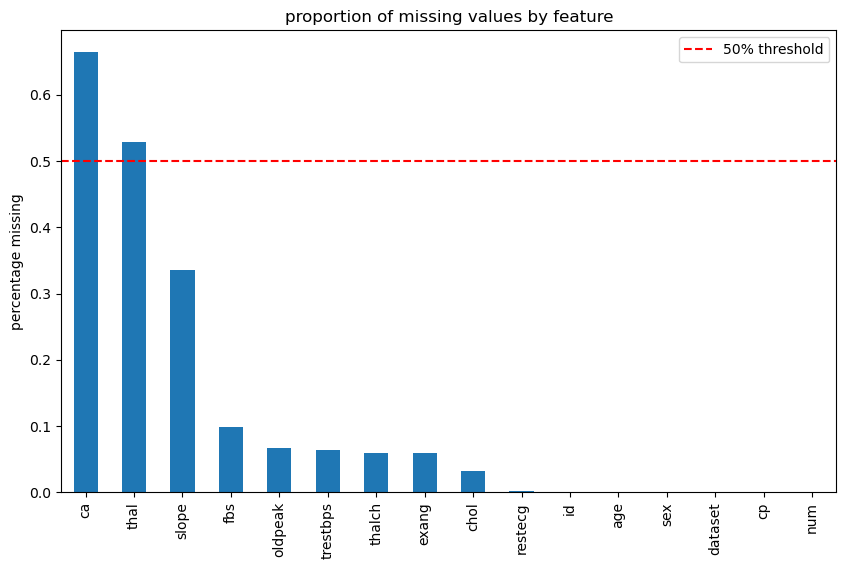

In [280]:
missing_props = h.isna().mean().sort_values(ascending=False) * 100

print("missing value prctg:")
print(missing_props[missing_props > 0].to_string())

plt.figure(figsize=(10, 6))
h.isna().mean().sort_values(ascending=False).plot.bar()
plt.title('proportion of missing values by feature')
plt.ylabel('percentage missing')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% threshold')
plt.legend()
plt.show()

**Answer:** To handle missing values, we can use imputation by replacing missing data with plausible values (mean/median for numerical, mode for categorical)

Fill the missing values, for categorical features create new category `'NOT GIVEN'`

In [282]:
fill_dict = {}
cat_cols = h.select_dtypes(include=['object', 'category']).columns
num_cols = h.select_dtypes(include=['float64', 'int64']).columns

for col in cat_cols:
    fill_dict[col] = 'NOT GIVEN'
for col in num_cols:
    fill_dict[col] = h[col].median()


df_filled = h.fillna(fill_dict)

print(df_filled)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina     130.0  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic     130.0  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

# Task 5 (2 points)

Convert every numerical variable into z-scores:

In [179]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [288]:
num_vars = ['chol', 'thalch', 'oldpeak', 'trestbps', 'age', 'ca', 'num']
h_cln = h.dropna(subset=numerical_vars) 
h_z = h_cln.copy()
h_z[num_vars] = h_z[num_vars].apply(zscore)
z_val = h_z[num_vars]
num1_vars = z_val.max(), z_val.min()
num1_vars

(chol        5.192723
 thalch      2.301130
 oldpeak     4.465997
 trestbps    3.870035
 age         2.493944
 ca          2.483193
 num         2.483163
 dtype: float64,
 chol       -3.888047
 thalch     -3.365048
 oldpeak    -1.600466
 trestbps   -2.134570
 age        -2.858135
 ca         -0.725856
 num        -0.774831
 dtype: float64)

Find the most extreme value in the dataset: in what column is it in?

In [292]:
z_val = h_z[num_vars]


absolute_z_val = z_val.abs()
max_z = absolute_z_val.max().max()
max_col = absolute_z_val.max().idxmax()
max_z_row = absolute_z_val.max(axis=1).idxmax()


print(f"z-score: {max_z}")

print(f"max value is in column: {max_col}")

z-score: 5.19272297941604
max value is in column: chol


**Answer:** chol

Draw the distributions on one plot. Adjust the visible area of the histogram in such way, that the bar for the most extreme value is visible. It is ok to cut  very high bars.

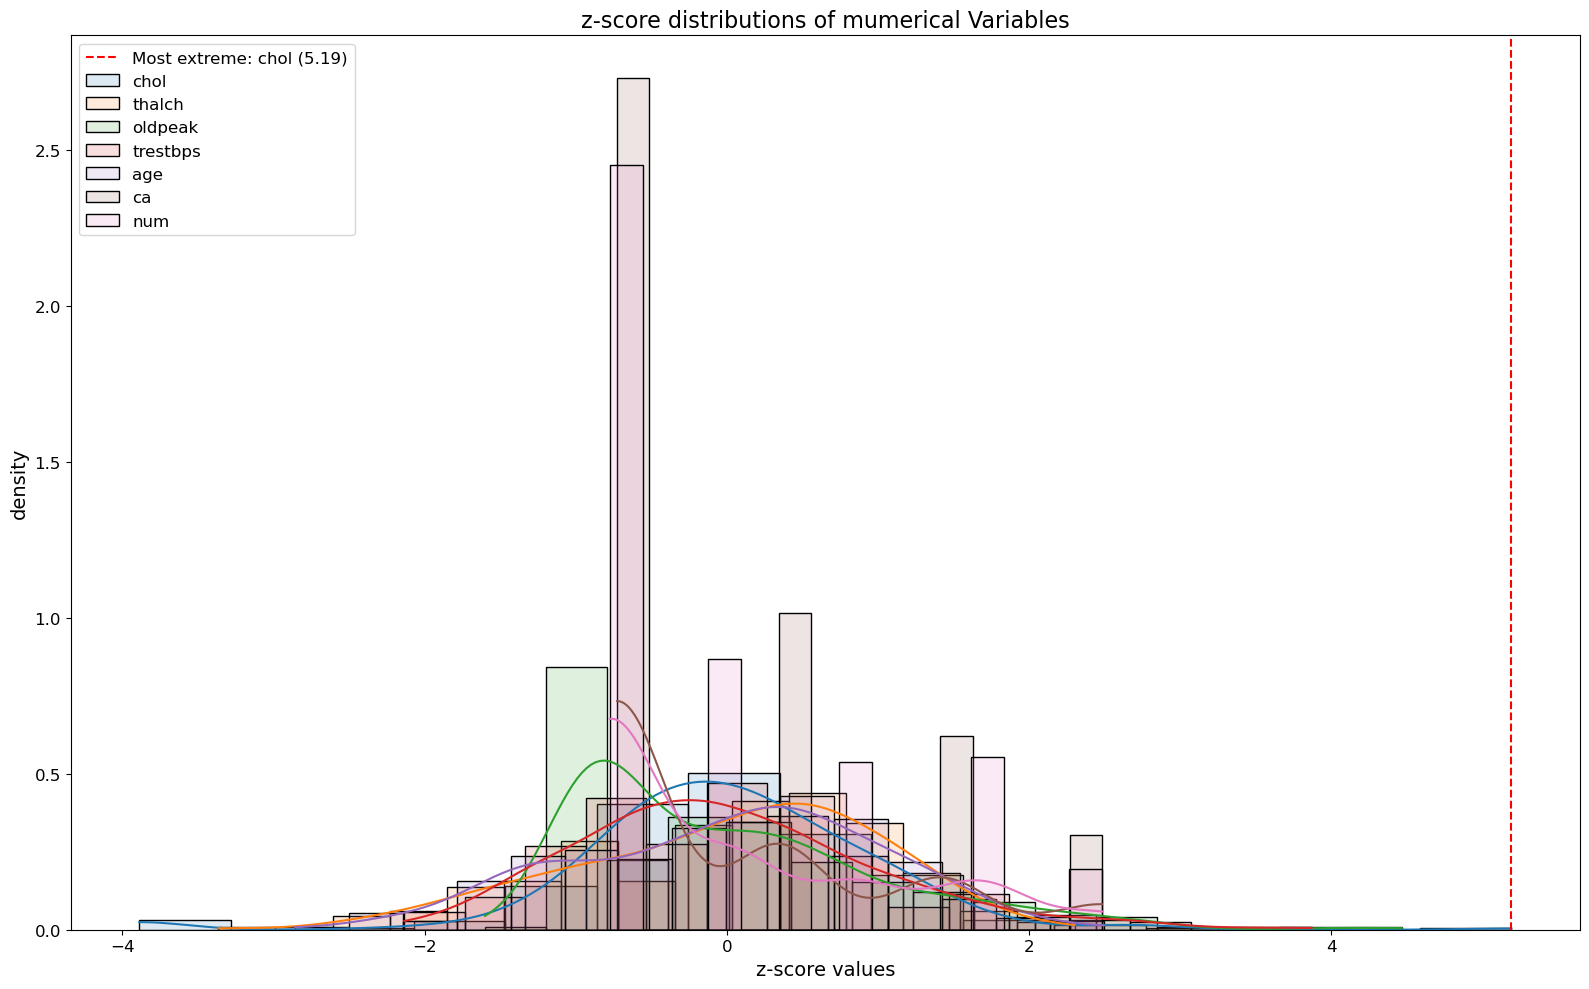

In [295]:
plt.figure(figsize=(16, 10))

for col in numerical_vars:
    sns.histplot(h_z[col], kde=True, stat='density', alpha=0.15, label=col, bins=15)

plt.axvline(x=h_z.loc[max_z_row, max_col], color='red', linestyle='--', 
           label=f'Most extreme: {max_col} ({h_z.loc[max_z_row, max_col]:.2f})')

plt.title('z-score distributions of mumerical Variables', fontsize=16)  
plt.legend(fontsize=12)  
plt.xlabel('z-score values', fontsize=14)  
plt.ylabel('density', fontsize=14) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

plt.tight_layout()  
plt.show()